In [1]:
##using pd_np_plt_etc enviroment
import subprocess
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

##go to folder
os.chdir('/archive/mirzaa_g/exomes/result_files_0321/graphing_0321')

Setup Complete


In [14]:
##got master ped tracking 031921, so import
exome_data = pd.read_excel("master_ped_tracking_120920.xlsx", 
                    sheet_name='Ped Tracking', index_col='family_id',
     engine='openpyxl')

# exome_data.head()
exome_data.shape

(619, 88)

In [26]:
##only use the families we want
exome_data_red = exome_data.loc[exome_data['dbd_include'] == 1]
exome_data_red.shape

(545, 88)

In [27]:
##ped types
ped_type_counts = exome_data_red.classification.value_counts()
print(ped_type_counts)


Trio           383
Singleton       48
Trio*           41
Duo             31
Quad            21
Multiplex        9
Sibship          4
Duo*             4
Singleton*       3
Parent-sibs      1
Name: classification, dtype: int64


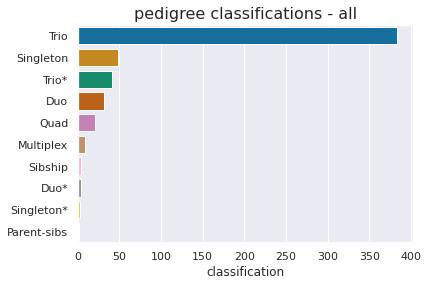

In [28]:
##seaborn alt bar chart
plt.title('pedigree classifications - all', fontsize =16)
ped_type_counts = exome_data_red.classification.value_counts()
sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("all_pedigree_types.barchart.pdf", bbox_inches="tight")

<class 'pandas.core.series.Series'>


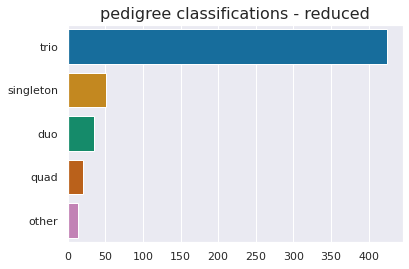

In [29]:
##graph ped types, but combine some type... use apply
def new_ped_type(row):
    if row.classification == 'Trio*' or row.classification == 'Trio':
        return 'trio'
    elif row.classification == 'Singleton*' or row.classification == 'Singleton':
        return 'singleton'
    elif row.classification == 'Duo*' or row.classification == 'Duo':
        return 'duo'
    elif row.classification == 'Quad*' or row.classification == 'Quad':
        return 'quad'
    else:
        return 'other'

ped_types = exome_data_red.apply(new_ped_type, axis='columns')

ped_type_counts = ped_types.value_counts()

print(type(ped_type_counts))

##barchart
plt.title('pedigree classifications - reduced', fontsize =16)
sns.set(font_scale=1) 
sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, palette="colorblind",orient='h' )
plt.savefig("reduced_pedigree_types.barchart.pdf", bbox_inches="tight")

In [37]:
##ethniticties -- all the same within pedigree
# ped_type_counts = exome_data_red["Original ethnicity"].value_counts()
eth_type_counts = exome_data_red["NIH Ethnicity"].str.split(',').str[0].value_counts()
print(eth_type_counts)


White                 336
Unknown               126
Mixed                  59
Asian                  18
Black or African        4
Hispanic or Latino      2
Name: NIH Ethnicity, dtype: int64


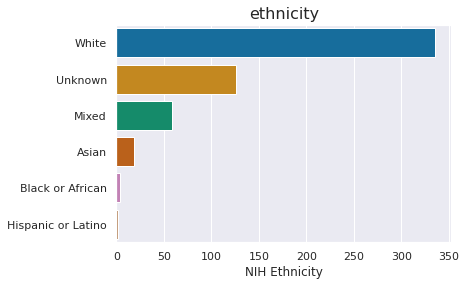

In [38]:
##seaborn alt bar chart
plt.title('ethnicity', fontsize =16)
sns.barplot(y=eth_type_counts.index, x=eth_type_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("ethnicity_types.barchart.pdf", bbox_inches="tight")

In [39]:
##proband gender (just get first gender, may need to get all)
gender_counts = exome_data_red["Gender* "].str.split(',').str[0].value_counts()
print(gender_counts)

m          299
f          232
unknown     14
Name: Gender* , dtype: int64


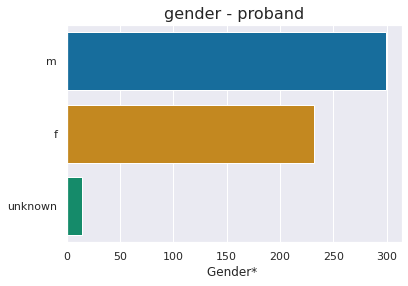

In [40]:
##seaborn alt bar chart
plt.title('gender - proband', fontsize =16)
sns.barplot(y=gender_counts.index, x=gender_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("gender_proband.barchart.pdf", bbox_inches="tight")

In [46]:
##proband sample type (just get first gender, may need to get all)
sample_counts = exome_data_red.proband_sample_type.str.split(',').str[0].str.split(' ').str[0].str.split('-').str[0].str.lower().value_counts()
print(sample_counts)

blood           229
saliva          197
dna              60
fibroblasts      12
brain            12
pericranium       8
fibroblast        8
skin              2
buccal            2
peripheral        2
lb                1
missing           1
paraffin          1
lipoma            1
saliva/cheek      1
cultured          1
eyelid            1
tumor             1
cerebellum        1
tooth             1
Name: proband_sample_type, dtype: int64


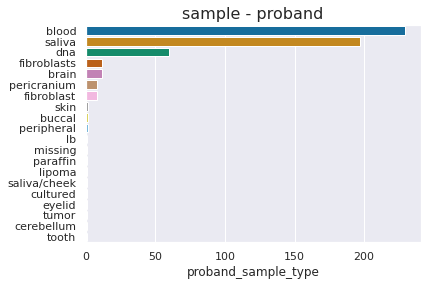

In [47]:
##seaborn alt bar chart
plt.title('sample - proband', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("sample_type_proband.barchart.pdf", bbox_inches="tight")